In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

C:\Users\asus\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\asus\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
dataset = pd.read_csv('appl_1980_2014.csv')

In [3]:
dataset.shape

(8465, 7)

In [4]:
dataset.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


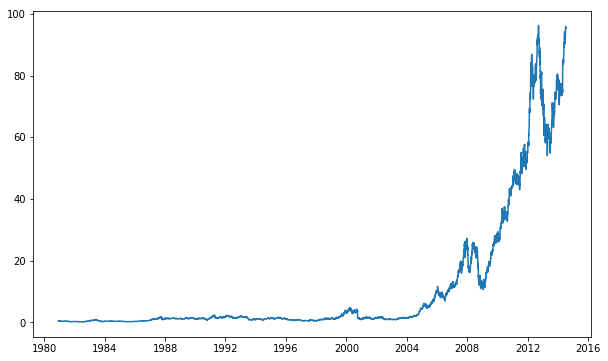

In [9]:
plt.figure(figsize=(10,6))
dataset['Date'] = pd.to_datetime(dataset['Date'])
plt.plot(dataset['Date'], dataset['Adj Close'])
plt.show()

In [10]:
X = dataset.iloc[:,1:5].values
y = dataset.iloc[:,-1].values

In [11]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [12]:
X[:1]

array([[-0.01637063, -0.02129753, -0.02352917, -0.0225504 ]])

In [13]:
y = y.reshape((y.shape[0],1))
y = sc.fit_transform(y)

In [24]:
newX = []
n = len(X)
X0 = np.ones(n)
newX.append(X0)

for i in range(X.shape[1]):
    newX.append(X[:,i])

In [25]:
newX = np.asarray(newX)

In [26]:
newX.shape

(5, 8465)

In [27]:
newX = newX.T

In [28]:
newX.shape

(8465, 5)

In [29]:
newX[0]

array([ 1.        , -0.01637063, -0.02129753, -0.02352917, -0.0225504 ])

In [30]:
coef = np.zeros(newX.shape[1])

In [31]:
def cost_function(x,y,coef):
    cost = np.sum((np.dot(x,coef) - y) ** 2) / n
    return cost

In [32]:
cost_function(newX,y,coef)

8464.999999999922

In [33]:
def gradientDescent(x,y,epochs,alpha):
    coef = np.zeros(newX.shape[1])
    costHistory = [0] * epochs
    for i in range(epochs):
        y_pred = np.dot(x,coef)
        loss = y_pred - y
        grad = (2/n) * loss.T.dot(x)
        coef = coef - alpha * grad
        costHistory[i] = cost_function(x,y,coef)
    
    return coef,costHistory

In [57]:
epochs = 2000
alpha = 0.0003
coef,cost = gradientDescent(newX,y.flatten(),epochs,alpha)

In [58]:
coef

array([3.11203868e-17, 2.41830153e-01, 2.41702337e-01, 2.42085181e-01,
       2.41985464e-01])

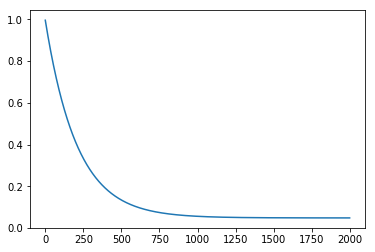

In [59]:
x_axis = [i for i in range(epochs)]
plt.plot(x_axis, cost)
plt.show()

In [60]:
cost[-1]

0.04836264253556972

In [61]:
testX = np.array([[1,96.27,96.80,93.92,95.35]])

In [63]:
testX = sc.transform(testX)

In [64]:
np.dot(testX,coef)

array([3.8686854])

In [65]:
y[0]

array([3.98712448])

In [66]:
sc.inverse_transform(np.dot(testX,coef))

array([92.84717293])